<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

C:\Users\Leah Pettigrew\anaconda3\envs\LeahsEnvironment\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Create data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [3]:
## Convert data into a DataFrame

# Declare the column names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [4]:
X.head()

,A,B
0,-0.065516,-0.281888
1,0.005552,-0.993473
2,-0.230013,-0.998284
3,-0.139510,0.996510
4,-0.227364,-0.283167


In [5]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.000769    0.003488
std      0.524620    0.520875
min     -1.042061   -1.034826
25%     -0.300405   -0.289475
50%      0.008375    0.004253
75%      0.294588    0.283083
max      1.071380    1.074642

Sample of X__________________________________________________
          A         B
0 -0.065516 -0.281888
1  0.005552 -0.993473
2 -0.230013 -0.998284
3 -0.139510  0.996510
4 -0.227364 -0.283167


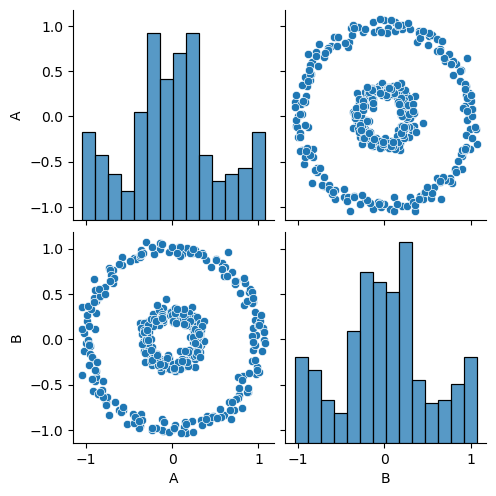

In [6]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types - Many types of data sets, important to know what type you have access to so you can import it and manipulate it correctly

- Availability - how easily the data is available, where to get the data from, confidentiality of data etc.

- Dispersion and Distribution - Data that is circular like this above is exactly what K Means is used on


### Question: Which features could/should be used to cluster the data points?

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

In [7]:
def print_centroids(centroids):
    global step
    if show_steps:
        print('(Step) Step %d' % step)
        for c in centroids:
            print(', '.join(['%.3f' % f for f in c]))
        step += 1

In [8]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    print_centroids(centroids)

    return centroids

In [9]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( np.square(p - q).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [10]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    print_centroids(c)

    return c

In [11]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    for i in range(len(centroids)):
        for s in range(step + 1):
            e = [z[i][0] for z in centroids_list]
            f = [z[i][1] for z in centroids_list]
            ax.plot(e, f, c = 'k', marker = '+', linewidth = 1)

        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [ ]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = ___ # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = ___

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

In [12]:
## Flag intermediate output

step = 0
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

(Step) Step 0
1.032, -0.587
-0.944, -0.330
-0.531, -1.020
-0.903, 0.269
-0.623, -0.648
(Step) Step 1
0.582, -0.050
-0.932, -0.260
-0.139, -0.945
-0.245, 0.435
-0.181, -0.304
(Step) Step 2
0.582, 0.034
-0.907, -0.222
-0.023, -0.911
-0.185, 0.506
-0.111, -0.197
(Step) Step 3
0.599, 0.081
-0.907, -0.176
0.034, -0.898
-0.164, 0.553
-0.100, -0.163
(Step) Step 4
0.609, 0.112
-0.904, -0.131
0.077, -0.886
-0.150, 0.603
-0.088, -0.125
(Step) Step 5
0.626, 0.131
-0.902, -0.116
0.090, -0.881
-0.146, 0.692
-0.080, -0.081
(Step) Step 6
0.674, 0.155
-0.900, -0.103
0.103, -0.876
-0.175, 0.803
-0.049, -0.040
(Step) Step 7
0.779, 0.169
-0.900, -0.103
0.103, -0.876
-0.197, 0.870
-0.018, -0.013
(Step) Step 8
0.864, 0.175
-0.900, -0.103
0.103, -0.876
-0.198, 0.880
-0.002, -0.004
(Step) Step 9
0.874, 0.174
-0.900, -0.103
0.103, -0.876
-0.198, 0.880
0.000, -0.003
(Step) Step 10
0.874, 0.174
-0.900, -0.103
0.103, -0.876
-0.198, 0.880
0.000, -0.003


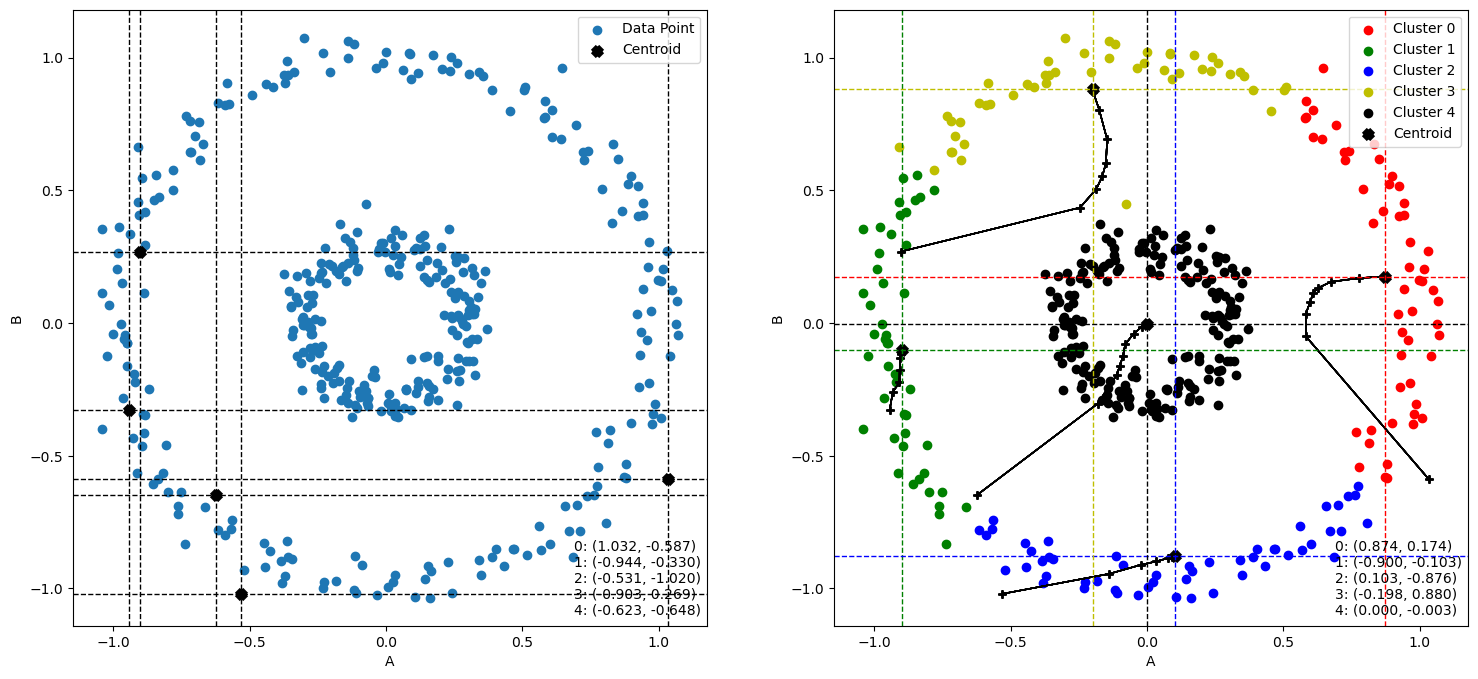

In [13]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 5

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### Question: What happens if the algorithm is run multiple times?

It could return very different results, as the centroid positions are initially chosen at random 


### Question: What happens if `K` is changed?

As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. 

>

>

>



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



